
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Confusion Matrix:


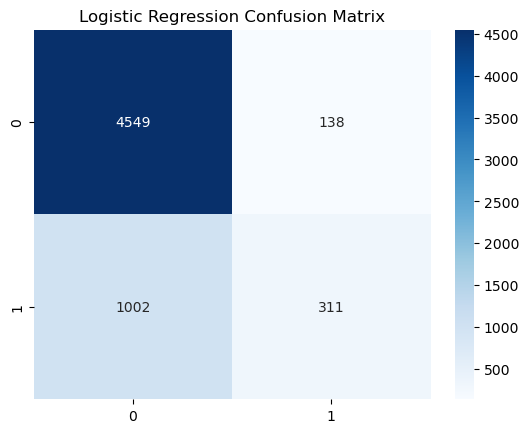

Logistic Regression ROC-AUC Score: 0.7269867506354779


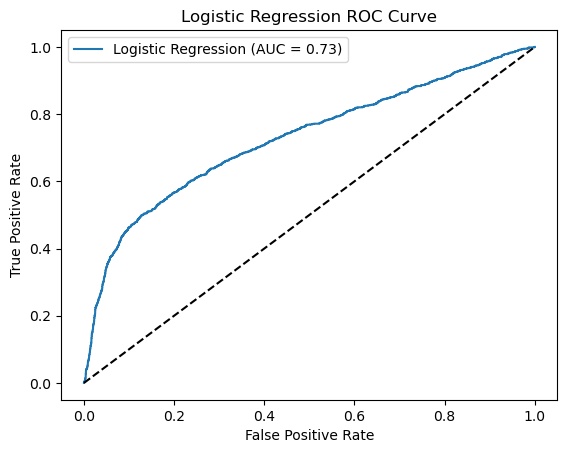


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.40      1313

    accuracy                           0.72      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000

Confusion Matrix:


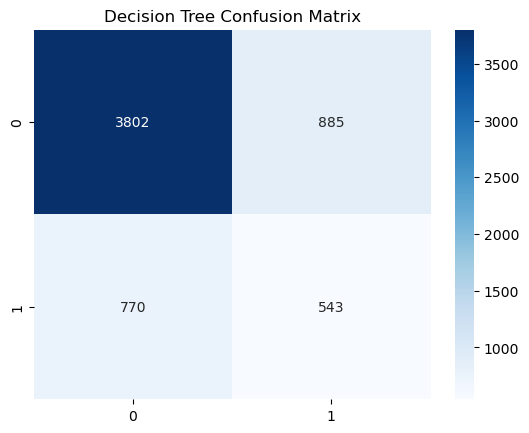

Decision Tree ROC-AUC Score: 0.6124270417227343


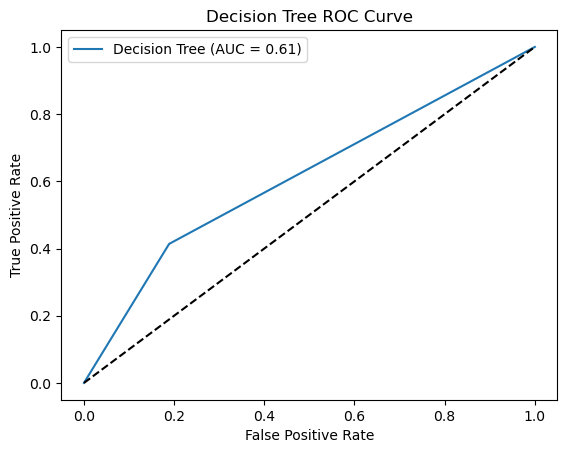


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix:


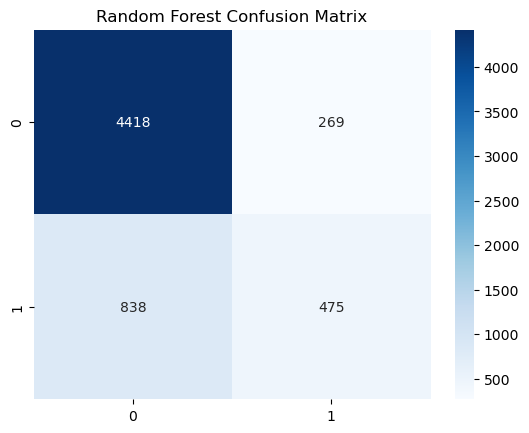

Random Forest ROC-AUC Score: 0.7594410882883106


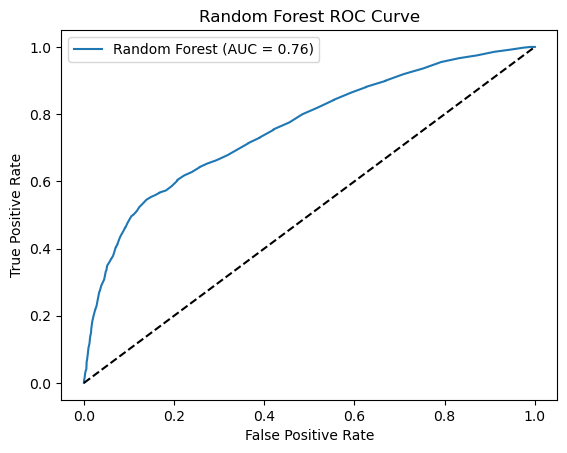


All models trained and evaluated successfully.


In [1]:
# Credit Scoring Model using Logistic Regression, Decision Tree, and Random Forest

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
file_path = r"C:\Users\siddh\OneDrive\Desktop\default of credit card clients.xls"
df = pd.read_excel(file_path, header=1)

# Step 3: Preprocess data
# Drop ID column if present
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)

# Drop rows with missing values
df = df.dropna()

# Define features and target
target_column = 'default payment next month'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Define evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print(f"{model_name} ROC-AUC Score: {roc_auc}")
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()

# Step 7: Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, X_test, y_test, "Logistic Regression")

# Step 8: Train Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test, "Decision Tree")

# Step 9: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

# Step 10: Completion message
print("\nAll models trained and evaluated successfully.")
